In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.python.keras.layers.normalization_v2 import BatchNormalization
import numpy as np

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 120
Channel = 1
n_class = 4

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/COVID-19_Radiography_Dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale')
class_names = dataset.class_names

Found 21165 files belonging to 4 classes.


In [4]:
def get_dataset_partition(dataset,train_split=0.98,dev_split=0.02,shuffle=True, shuffle_size=10000):
    assert (train_split + dev_split) == 1
    data_size = len(dataset)
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * data_size)

    train_data = dataset.take(train_size)
    dev_data = dataset.skip(train_size)
    return train_data, dev_data

In [5]:
train_data, dev_data = get_dataset_partition(dataset,train_split=0.98,dev_split=0.02,shuffle=True)

dev_data = dev_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
model = tf.keras.models.load_model('covid-19-lungs-120-adam-Dropout.h5')

In [11]:
score = model.evaluate(dev_data)
pred = model.predict(dev_data)

14/14 [==============================] - 1s 40ms/step - loss: 0.5907 - accuracy: 0.7790


In [13]:
predicted_category = tf.argmax(pred,axis=1)
predicted_category

<tf.Tensor: shape=(448,), dtype=int64, numpy=
array([1, 2, 1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 3, 0, 2, 0, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 0, 2, 3, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 3, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 3, 3, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1,
       0, 2, 2, 2, 3, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 3, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2,
     

In [14]:
true_categories = tf.concat([y for x,y in dev_data],axis=0)
true_categories

<tf.Tensor: shape=(448,), dtype=int32, numpy=
array([2, 2, 2, 1, 2, 3, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 3, 0, 1, 2, 3, 1, 2, 1, 0, 2, 2,
       3, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2,
       3, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1,
       0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1,
       1, 2, 3, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 2,
       0, 3, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 3, 3, 1, 0, 2, 0, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2,
       0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 3,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 3, 0, 1, 0, 2, 2, 2, 0, 2, 3, 2, 0, 1, 2, 2, 1,
       1, 1, 1, 2, 3, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       3, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 3, 0,
     

[0.26785714 0.375      0.60655738 0.25      ]


<AxesSubplot:>

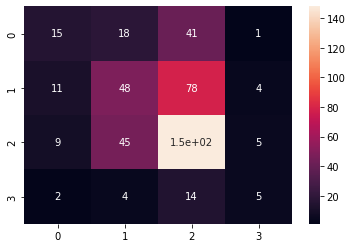

In [23]:
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sns

f1 = f1_score(y_true = true_categories,y_pred = predicted_category,average= None)
print(f1)
cm = confusion_matrix(true_categories,predicted_category)
sns.heatmap(cm,annot = True)